In [1]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer

import numpy as np
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [2]:
# Extract word vectors
word_embeddings = {}
f = open('C:\\Users\\yahoo\\Desktop\\glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

# Method 1: frequency-driven approach
There are four steps in total:

1.Get the frequency of words

2.Get the score of sentence

3.Find the threshold according to the average score

4.Use the threshold to find summary sentence

# Method the frequency of words

In [3]:
#We use word tokenize to get the words in texts file.
#Then use word stemmer to normalize each words
#The dict will store appearing times of each words, which works like hash table
#The key is word, and the value is the appearing times

def frequency_table(text)->dict:
    stopword = set(stopwords.words("english"))
    words = word_tokenize(text)
    W = [word.lower() for word in words]
    result = dict()
    for word in W:
        if word in stopword:  #we ignore the stopword in our case
            continue
        if word in result:    #If the word already existing in dict, appearing time +1
            result[word] += 1
        else:
            result[word] = 1
    return result

# Method for find the score of sentence

In [4]:
def score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        sentence_length = (len(word_tokenize(sentence)))              #sentence_length record the length of a sentence
        
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        #we use the formular p(w) = c(w)/N
        #which p(w) is computed from input, c(w) is the occurance of words, N is the length of input
        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // sentence_length

    return sentenceValue

# Method for find the threshold

In [5]:
def find_average_score(sentenceValue) -> int:
    sumValues = 0
    for value in sentenceValue:
        sumValues += sentenceValue[value]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average

# Method for generate summary

In [6]:
def generate_summary(sentences, sentenceValue, threshold):
    summary = ""

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += "\n" + sentence

    return summary

In [7]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# Now we start to generate the summary

In [8]:
f = open("C:\\Users\\yahoo\\Desktop\\textfile.txt",encoding="utf-8")
text = (f.read())
f.close()

In [9]:
sentences = sent_tokenize(text)
sentences[:5]

['Mental Models: How to Train Your Brain to Think in New Ways?',
 'You can train your brain to think better.',
 'One of the best ways to do this is to expand the set of mental models you use to think.',
 'Let me explain what I mean by sharing a story about a world-class thinker.',
 'I first discovered what a mental model was and how useful the right one could be while I was reading a story about Richard Feynman, the famous physicist.']

# Step1:get the frequency of words

In [10]:
freq_table = frequency_table(text)
print(freq_table)

{'mental': 41, 'models': 31, ':': 3, 'train': 2, 'brain': 3, 'think': 4, 'new': 6, 'ways': 2, '?': 3, 'better': 4, '.': 107, 'one': 12, 'best': 4, 'expand': 1, 'set': 7, 'use': 3, 'let': 1, 'explain': 4, 'mean': 1, 'sharing': 1, 'story': 2, 'world-class': 3, 'thinker': 2, 'first': 1, 'discovered': 1, 'model': 11, 'useful': 4, 'right': 1, 'could': 3, 'reading': 2, 'richard': 2, 'feynman': 10, ',': 91, 'famous': 1, 'physicist': 1, 'received': 1, 'undergraduate': 1, 'degree': 1, 'mit': 3, 'ph.d.': 3, 'princeton': 3, 'time': 1, 'developed': 1, 'reputation': 2, 'waltzing': 1, 'math': 2, 'department': 2, 'solving': 1, 'problems': 2, 'brilliant': 2, 'students': 1, "n't": 5, 'solve': 2, 'people': 3, 'asked': 2, 'claimed': 1, 'secret': 3, 'weapon': 1, 'intelligence': 2, 'rather': 1, 'strategy': 1, 'learned': 2, 'high': 2, 'school': 4, 'according': 1, 'physics': 4, 'teacher': 2, 'stay': 1, 'class': 2, 'day': 2, 'gave': 1, 'challenge': 1, '``': 15, "''": 15, 'said': 1, 'talk': 2, 'much': 4, 'make

In [11]:
print(freq_table["mental"])

41


# Step2: Get the score of sentence

In [12]:
sentence_scores = score_sentences(sentences, freq_table)
print(sentence_scores)

{'Mental Mod': 7, 'You can tr': 13, 'One of the': 10, 'Let me exp': 8, 'I first di': 9, 'Feynman re': 10, 'During tha': 9, 'When peopl': 8, 'According ': 10, '"Feynman,"': 11, 'I know why': 27, "You're bor": 28, "So I'm goi": 11, 'You go up ': 6, 'So each da': 7, 'And it was': 10, '"That book': 13, '"It turns ': 6, 'But I caug': 10, 'So because': 12, '"The resul': 6, 'If it was ': 7, 'Then I com': 13, 'So I got a': 6, 'Every Ph.D': 12, 'What separ': 10, 'It was the': 13, 'He had a b': 22, 'What is a ': 9, 'A mental m': 16, 'It is a co': 8, 'Mental mod': 32, 'For exampl': 13, 'Game theor': 11, 'Entropy is': 11, 'They are t': 13, 'Learning a': 9, 'There is n': 6, 'As histori': 10, 'Thus, the ': 18, 'The best m': 16, 'They are b': 16, 'Understand': 9, 'This is wh': 10, 'The Secret': 14, 'Expanding ': 30, 'We all hav': 12, 'As you gro': 11, "Here's the": 7, 'This pitfa': 6, 'The more y': 8, 'What looks': 14, 'As the com': 10, 'When a cer': 12, 'Consider t': 14, 'He asks, "': 8, 'Then, he p

# Step3: Get the threshold 

In [13]:
threshold = find_average_score(sentence_scores)
print(threshold)

12


# Step4: Get the summary

In [14]:
summary1 = generate_summary(sentences, sentence_scores, 1.2*threshold)
print(summary1)


I know why.
You're bored.
He had a broader set of mental models.
A mental model is an explanation of how something works.
Mental models are deeply held beliefs about how the world works.
Mental models guide your perception and behavior.
Mental models are imperfect but useful.
Thus, the real test of knowledge is not the truth, but utility."
The best mental models are the ideas with the most utility.
They are broadly useful in daily life.
Expanding your set of mental models is something experts need to work on just as much as novices.
Then, he provides answers from different experts.
Technically speaking, none of these experts are wrong.
Each individual mental model is just one view of reality.
All perspectives hold some truth.
None of them contain the complete truth.
When your set of mental models is limited, so is your potential for finding a solution.
In order to unleash your full potential, you have to collect a range of mental models.
Thus, the secret to great thinking is to learn 

# Method 2: Latent Semantic Analysis with TextRanking algorithm
This method works different from frequcey driven method, but it also have four steps:

1.Clean the sentences,including punctuations, numbers, stopwords and special characters

2.Create vector for each sentences

3.Use consine similarity to find the similarities between each sentences. Bulid the similarity matrix

4.Apply textRank algorithm

# Step 1: Clean the sentence

In [15]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [16]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [17]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

# Step 2: Create vector for each sentence

In [18]:
#We will first take the vectors (each of size 100 elements) for the constituent words in the sentence
#And then take the average/average of these vectors to get the combined vector of the sentence.

sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

# Step 3: Use consine similarity to build similarity matrix

In [19]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

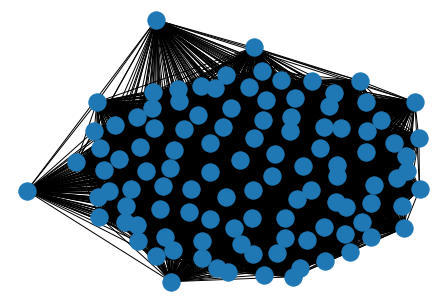

In [22]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

nx.draw(nx_graph)

# Step 4: Rank the sentense using textRank algorithm

In [23]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [24]:
# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_sentences[i][1])

My hope is to create a list of the most important mental models from a wide range of disciplines and explain them in a way that is not only easy to understand but also meaningful and practical to the daily life of the average person.
One of the best ways to do this is to expand the set of mental models you use to think.
This is why it is important to not only learn new mental models but to consider how they connect with one another.
Expanding your set of mental models is something experts need to work on just as much as novices.
Thus, the secret to great thinking is to learn and employ a variety of mental models.
Of all the mental models' humankind has generated throughout history, there are just a few dozen that you need to learn to have a firm grasp of how the world works.
The mind's eye needs a variety of mental models to piece together a complete picture of how the world works.
Learning a new mental model gives you a new way to see the world—like Richard Feynman learning a new math

# More sample for method 1

In [25]:
f = open("C:\\Users\\yahoo\\Desktop\\textfile2.txt",encoding="utf-8")
text = (f.read())
f.close()

sentences = sent_tokenize(text)
#get frequecy table
freq_table = frequency_table(text)
#get sentence score
sentence_scores = score_sentences(sentences, freq_table)
#find threshold
threshold = find_average_score(sentence_scores)
#get summary
summary2 = generate_summary(sentences, sentence_scores, 1.2*threshold)
print(summary2)


First Principles: Elon Musk on the Power of Thinking for Yourself.
First principles thinking, which is sometimes called reasoning from first principles, is one of the most effective strategies you can employ for breaking down complicated problems and generating original solutions.
Given the high price, he began to rethink the problem.
So I said, okay, let’s look at the first principles.
SpaceX was born.
First principles thinking is the act of boiling a process down to the fundamental parts that you know are true and building up from there.
Defining First Principles Thinking.
A military tank.
A bicycle.
Tank: metal treads, steel armor plates, and a gun.
Bicycle: handlebars, wheels, gears, and a seat.
This is the process of first principles thinking in a nutshell.
Deconstruct then reconstruct.
How First Principles Drive Innovation.
First principles thinking helps you to cobble together information from different disciplines to create new ideas and innovations.
The Challenge of Reasoning

In [26]:
f = open("C:\\Users\\yahoo\\Desktop\\textfile3.txt",encoding="utf-8")
text = (f.read())
f.close()

sentences = sent_tokenize(text)
#get frequecy table
freq_table = frequency_table(text)
#get sentence score
sentence_scores = score_sentences(sentences, freq_table)
#find threshold
threshold = find_average_score(sentence_scores)
#get summary
summary3 = generate_summary(sentences, sentence_scores, 1.2*threshold)
print(summary3)


Entropy: Why Life Always Seems to Get More Complicated.
Murphy's Law states, “Anything that can go wrong, will go wrong.”
This pithy statement references the annoying tendency of life to cause trouble and make things difficult.
Murphy's Law is just a common adage that people toss around in conversation, but it is related to one of the great forces of our universe.
entropy.
But in reality, that never happens.
Quite simply, because the odds are overwhelmingly against it.
Mathematically speaking, an orderly outcome is incredibly unlikely to happen at random.
But in practice, it never happens.
Entropy is a measure of disorder.
Left to its own devices, life will always become less structured.
Sand castles get washed away.
Weeds overtake gardens.
Ancient ruins crumble.
Cars begin to rust.
People gradually age.
The pull of entropy is relentless.
Everything decays.
Disorder always increases.
Without Effort, Life Tends to Lose Order.
Before you get depressed, there is good news.
You can solve 

# More sample for method 2

Over two thousand years ago, Aristotle defined a first principle as “the first basis from which a thing is known.”
First principles thinking is a fancy way of saying “think like a scientist.” Scientists don’t assume anything.
Even if you aren't trying to develop innovative ideas, understanding the first principles of your field is a smart use of your time.
Many of the most groundbreaking ideas in history have been a result of boiling things down to the first principles and then substituting a more effective solution for one of the key parts.
Without reasoning by first principles, you spend your time making small improvements to a bicycle rather than a snowmobile.
First principles thinking, which is sometimes called reasoning from first principles, is one of the most effective strategies you can employ for breaking down complicated problems and generating original solutions.
By comparison, first principles thinking requires you to abandon your allegiance to previous forms and put the fu

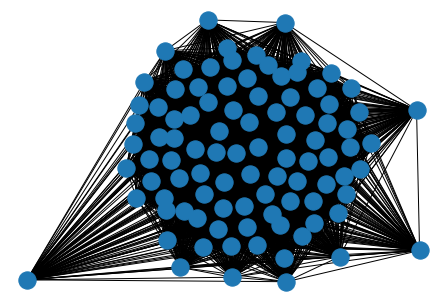

In [27]:
f = open("C:\\Users\\yahoo\\Desktop\\textfile2.txt",encoding="utf-8")
text = (f.read())
f.close()

sentences = sent_tokenize(text)

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

nx.draw(nx_graph)

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_sentences[i][1])

The collection of atoms that make up your body could be arranged in a virtually infinite number of ways and nearly all of them lead to no form of life whatsoever.
As one scientist put it, “Entropy is sort of like Murphy's Law applied to the entire universe.”
It is nobody's fault that life has problems.
At the very least, life will not be optimal—maybe you didn't grow up in the optimal culture for your interests, maybe you were exposed to the wrong subject or sport, maybe you were born at the wrong time in history.
Left to its own devices, life will always become less structured.
Entropy: Why Life Always Seems to Get More Complicated.
If anything, our lives become more complicated and gradually decline into disorder rather than remaining simple and structured.
Without Effort, Life Tends to Lose Order.
Murphy's Law is just a common adage that people toss around in conversation, but it is related to one of the great forces of our universe.
Given what we know about entropy, what do you thi

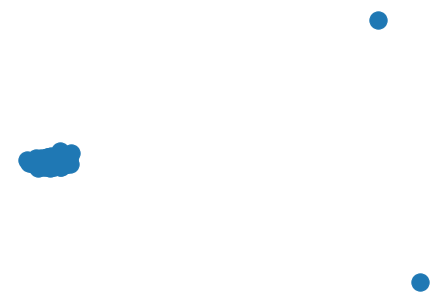

In [28]:
f = open("C:\\Users\\yahoo\\Desktop\\textfile3.txt",encoding="utf-8")
text = (f.read())
f.close()

sentences = sent_tokenize(text)

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

nx.draw(nx_graph)

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Extract top 10 sentences as the summary
for i in range(10):
    print(ranked_sentences[i][1])

In [29]:
#done here